In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

# 1, 2. Hoefding Inequality

In [2]:
def coin_toss(num_of_tosses=10, num_of_coins=1000):
    toss = ['H', 'T']
    result = []
    #[result.append([toss[j] for j in np.random.randint(2, size=num_of_tosses)])]
    for i in range(num_of_coins):
        result.append([toss[j] for j in np.random.randint(2, size=num_of_tosses)])
    return np.array(result)

In [3]:
def frequency_of_heads(result, num_of_tosses=10):
    v_one = len(np.where(result[0] == 'H')[0]) / num_of_tosses
    v_rand = len(np.where(result[np.random.randint(len(result))] == 'H')[0]) / num_of_tosses
    freq_head = []
    [freq_head.append(len(np.where(result[i] == 'H')[0])) for i in range(len(result))]
    v_min = np.min(np.array(freq_head)) / num_of_tosses
    return [v_one, v_rand, v_min]

In [4]:
def experiment_12(trails=100000, num_of_tosses=10, num_of_coins=1000):
    trails_result = []
    [trails_result.append(frequency_of_heads(coin_toss(num_of_tosses, num_of_coins))) for i in range(trails)]
    return np.array(trails_result)

In [5]:
start_time = time.time()
num_trails = 100000
trails = experiment_12(num_trails, 10, 1000)
end_time = time.time()
means = np.mean(trails, axis=0)


In [6]:
print('Time taken for {} trails is {}'.format(num_trails, (end_time - start_time)))
print('Average Fraction of Heads for first coin = {}'.format(means[0]))
print('Average Fraction of Heads for random coin = {}'.format(means[1]))
print('Average Fraction of Heads for the coin with minimum heads% = {}'.format(means[2]))
answer_choices = [0, 0.01, 0.1, 0.5, 0.67]
answers = ['a', 'b', 'c', 'd', 'e']
print('1. Difference values for E_in - {}'.format(np.absolute(np.array(answer_choices) - means[2])))
print('1. Answer for E_in is {}'.format(answers[np.argmin(np.absolute(np.array(answer_choices) - means[2]))]))


Time taken for 100000 trails is 1346.641705751419
Average Fraction of Heads for first coin = 0.499783
Average Fraction of Heads for random coin = 0.4994979999999959
Average Fraction of Heads for the coin with minimum heads% = 0.03758799999997677
1. Difference values for E_in - [ 0.037588  0.027588  0.062412  0.462412  0.632412]
1. Answer for E_in is b


(array([    92.,    971.,  16342.,      0.,  20308.,  45101.,  11752.,
             0.,   4321.,   1113.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

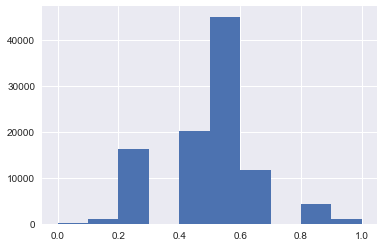

In [7]:
#sns.distplot(trails[:, 0])
plt.hist(trails[:, 0])
#for i in range(10+1):
#    print('For value {}, # of trails {}'.format(i, len(np.where(trails[:, 2]*10 == i)[0])))

(array([   121.,    956.,  16104.,      0.,  20694.,  45007.,  11706.,
             0.,   4374.,   1038.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

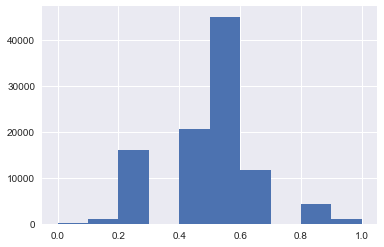

In [8]:
plt.hist(trails[:, 1])

(array([  6.24130000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.75860000e+04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ]),
 <a list of 10 Patch objects>)

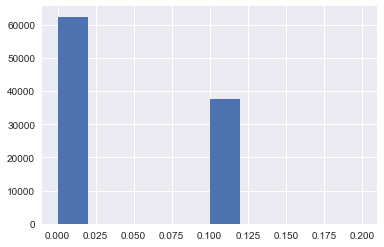

In [9]:
plt.hist(trails[:, 2])

# 5, 6, 7 Linear Regression

In [10]:
def target_line():
    x1, x2 = np.random.uniform(-1., 1., size=(2,2))
    slope = (x2[1] - x1[1]) / (x2[0] - x1[0])
    intercept = x2[1] - slope * x2[0]
    return np.array([intercept, slope, -1])

In [11]:
def generate_data(N):
    data = np.random.uniform(-1., 1., size=(N, 2))
    data_set = np.column_stack((np.ones(N), data))
    return data_set

In [12]:
def prediction(data, W):
    labels = np.sign(data.dot(W))
    return labels

In [13]:
def perceptron(data, correct_labels, W):
    counter = 0
    while True:
        trained_labels = prediction(data, W)
        miss_indices = np.where(trained_labels != correct_labels)
        if (len(miss_indices[0]) == 0):
            break
        index = np.random.choice(miss_indices[0])
        W = W + correct_labels[index] * data[index]
        counter += 1
    return (W, counter)

In [14]:
def linear_regression(training_set, correct_labels):
    # w = X.T X inverse X.T y
    W = np.dot(np.dot(inv(np.dot(training_set.transpose(), training_set)), training_set.transpose()), correct_labels)
    return W

In [15]:
def experiment_567(trails = 1000, N_in = 100, N_out = 1000, N_pla=10):
    iterations = []
    iter_prob_ein = []
    iter_prob_eout = []
    for t in range(trails):
        f = target_line()
        training_set = generate_data(N_in)
        correct_labels = prediction(training_set, f)
        # Linear Regression and training set error E_in
        W_lr = linear_regression(training_set, correct_labels)
        predicted_labels = prediction(training_set, W_lr)
        g_not_f = (correct_labels != predicted_labels)
        p = len([i for i in g_not_f if i == True]) / N_in
        iter_prob_ein.append(p)
        
        # Test set error rate - E_out
        test_set = generate_data(N_out)
        true_labels = prediction(test_set, f)
        predicted_labels = prediction(test_set, W_lr)
        
        g_not_f = (true_labels != predicted_labels)
        p = len([i for i in g_not_f if i == True]) / N_out
        iter_prob_eout.append(p)
        
        # PLA convergence for the weights from linear regression
        training_set = generate_data(N_pla)
        correct_labels = prediction(training_set, f)
        W_pla, counter = perceptron(training_set, correct_labels, W_lr)
        iterations.append(counter)
        
        
    return np.mean(iter_prob_ein), np.mean(iter_prob_eout), np.mean(iterations)

In [16]:
# run the experiment for LR
e_in, e_out, pla_iterations = experiment_567()


In [17]:
print('E-in is {}. E-out is {}'.format(e_in, e_out))
answer_choices = [0, 0.001, 0.01, 0.1, 0.5]
answers = ['a', 'b', 'c', 'd', 'e']
print('5. Difference values for E_in - {}'.format(np.absolute(np.array(answer_choices) - e_in)))
print('5. Answer for E_in is {}'.format(answers[np.argmin(np.absolute(np.array(answer_choices) - e_in))]))
print('6. Difference values for E_out - {}'.format(np.absolute(np.array(answer_choices) - e_out)))
print('6. Answer for E_out is {}'.format(answers[np.argmin(np.absolute(np.array(answer_choices) - e_out))]))
answers_7 = [1, 15, 300, 5000, 10000]
print('7. Difference values for PLA Iterations - {}'.format(np.absolute(np.array(answers_7) - pla_iterations)))
print('7. Answer for PLA Iterations is {}'.format(answers[np.argmin(np.absolute(np.array(answers_7) - pla_iterations))]))

E-in is 0.038810000000000004. E-out is 0.048039000000000005
5. Difference values for E_in - [ 0.03881  0.03781  0.02881  0.06119  0.46119]
5. Answer for E_in is c
6. Difference values for E_out - [ 0.048039  0.047039  0.038039  0.051961  0.451961]
6. Answer for E_out is c
7. Difference values for PLA Iterations - [  3.66800000e+00   1.03320000e+01   2.95332000e+02   4.99533200e+03
   9.99533200e+03]
7. Answer for PLA Iterations is a


# 8, 9, 10 Nonlinear Transformation

In [18]:
def simulate_noise(data, percentage):
    N = len(data)
    N_noise = int(N * percentage)
    random_indices = np.random.randint(N, size=N_noise)
    #print('Random Indices: {}'.format(random_indices))
    for i in range(len(random_indices)):
        if data[random_indices[i]] == 1:
            data[random_indices[i]] = -1
        else: 
            data[random_indices[i]] = 1
    return data

In [19]:
def prediction_lr(data):
    labels = np.sign(np.add(-0.6, np.sum(np.square(data), axis=1)))
    return labels

In [20]:
def experiment_8910(trails = 1000, N_in = 1000, N_out = 1000, N_pla=10):
    iterations = []
    iter_prob_ein = []
    iter_w_t = []
    iter_prob_eout = []
    for t in range(trails):
        f = target_line()
        training_set = generate_data(N_in)
        correct_labels = prediction_lr(training_set[:, 1:])
        correct_labels = simulate_noise(correct_labels, 10/100)
        # Linear Regression and training set error E_in
        W_lr = linear_regression(training_set, correct_labels)
        predicted_labels = prediction(training_set, W_lr)
        g_not_f = (correct_labels != predicted_labels)
        p = len([i for i in g_not_f if i == True]) / N_in
        iter_prob_ein.append(p)
        
        # Non-linear transformation
        # (1; x1; x2; x1*x2; x1^2; x2^2)
        transformed_training_set = np.column_stack((training_set, 
                                                    np.multiply(training_set[:, 1], training_set[:, 2]),
                                                   np.square(training_set[:, 1]),
                                                   np.square(training_set[:, 2])))
        W_tlr = linear_regression(transformed_training_set, correct_labels)
        iter_w_t.append(W_tlr)
        
        # Test set error rate - E_out
        test_set = generate_data(N_out)
        transformed_test_set = np.column_stack((test_set, 
                                                    np.multiply(test_set[:, 1], test_set[:, 2]),
                                                   np.square(test_set[:, 1]),
                                                   np.square(test_set[:, 2])))
        true_labels = prediction_lr(test_set[:, 1:])
        true_labels = simulate_noise(true_labels, 10/100)
        predicted_labels = prediction(transformed_test_set, W_tlr)
        
        g_not_f = (true_labels != predicted_labels)
        p = len([i for i in g_not_f if i == True]) / N_out
        iter_prob_eout.append(p)
        
        
    return np.mean(iter_prob_ein), np.mean(iter_w_t, axis=0), np.mean(iter_prob_eout)

In [21]:
e_in, w_t, e_out = experiment_8910(1000, 1000, 1000, 10)


In [22]:
np.set_printoptions(suppress=True)
print('e_in:{}\nw_t:{}\ne_out:{}'.format(e_in, w_t, e_out))

answers = ['a', 'b', 'c', 'd', 'e']
answer_8 = [0, 0.1, 0.3, 0.5, 0.8]
print('8. Difference values for E_in - {}'.format(np.absolute(np.array(answer_8) - e_in)))
print('8. Answer for E_in is {}'.format(answers[np.argmin(np.absolute(np.array(answer_8) - e_in))]))
answers_9 = [
    [-1, -0.05, 0.08, 0.13, 1.50, 1.50],
    [-1, -0.05, 0.08, 0.13, 1.50, 15.0],
    [-1, -0.05, 0.08, 0.13, 15.0, 1.50],
    [-1, -1.50, 0.08, 0.13, 0.05, 0.05],
    [-1, -0.05, 0.08, 1.50, 0.15, 0.15]
]
print('9. W vector for transformed X - {}'.format(w_t))
#print('9. Answer for E_out is {}'.format(answers[np.argmin(np.absolute(np.array(answers_9) - e_out))]))
answer_10 = [0, 0.1, 0.3, 0.5, 0.8]
print('10. Difference values for e_out - {}'.format(np.absolute(np.array(answer_10) - e_out)))
print('10. Answer for e_out is {}'.format(answers[np.argmin(np.absolute(np.array(answer_10) - e_out))]))

e_in:0.506177
w_t:[-1.0149777  -0.00037868 -0.00224469  0.00151316  1.59109194  1.5951449 ]
e_out:0.117231
8. Difference values for E_in - [ 0.506177  0.406177  0.206177  0.006177  0.293823]
8. Answer for E_in is d
9. W vector for transformed X - [-1.0149777  -0.00037868 -0.00224469  0.00151316  1.59109194  1.5951449 ]
10. Difference values for e_out - [ 0.117231  0.017231  0.182769  0.382769  0.682769]
10. Answer for e_out is b
